3 Phases:

1. Structural Investigation
2. Quality Investigation
3. EDA

# URL for the dataset with the data dictionary:   https://www.openml.org/search?type=data&status=active&id=42803

# 1. Import standard Libs

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

# 2. Grab your data

In [2]:
df_example = pd.read_csv('https://raw.githubusercontent.com/fenago/compas-analysis/master/compas-scores.csv')

In [3]:
df_example.to_csv("periodic_backup.csv")

In [4]:
# accepts ssl certs for download
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import certifi

In [5]:
from sklearn.datasets import fetch_openml

# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

In [6]:
# Extract feature matrix X and show 5 random samples
df_X = dataset["frame"]
df_X.sample(5)

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
11293   201501GD11040                       2.0           9.0   
128400  201514C121315                       1.0           9.0   
130409  201514K195815                       2.0           9.0   
71557   2015051501199                       2.0           3.0   
275275  2015460253422                       4.0           9.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
11293                       0.0                3.0   
128400                      0.0                5.0   
130409                      0.0               18.0   
71557                       0.0               18.0   
275275                      0.0                2.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
11293                                0.0                0.0   
128400                               0.0                6.0   
130409                               0.0                8.0   
71557                                0.0                1.0   
275275                               0.0                0.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
11293                        0.0                        0.0   
128400                       0.0                        0.0   
130409                       0.0                        0.0   
71557                        0.0                        0.0   
275275                       0.0                        0.0   

        Vehicle_Leaving_Carriageway  ...  Age_Band_of_Casualty  \
11293                           0.0  ...                   6.0   
128400                          0.0  ...                   8.0   
130409                          0.0  ...                   6.0   
71557                           0.0  ...                   5.0   
275275                          0.0  ...                   5.0   

        Casualty_Severity  Pedestrian_Location  Pedestrian_Movement  \
11293                 3.0                  0.0                  0.0   
128400                3.0                  0.0                  0.0   
130409                3.0                  0.0                  0.0   
71557                 3.0                  0.0                  0.0   
275275                3.0                  0.0                  0.0   

       Car_Passenger  Bus_or_Coach_Passenger  \
11293            0.0                     0.0   
128400           1.0                     0.0   
130409           0.0                     0.0   
71557            0.0                     0.0   
275275           1.0                     0.0   

        Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
11293                                  0.0            1.0   
128400                                 0.0            9.0   
130409                                 0.0            9.0   
71557                                  0.0            3.0   
275275                                 0.0            9.0   

        Casualty_Home_Area_Type  Casualty_IMD_Decile  
11293                       1.0                  3.0  
128400                      1.0                  6.0  
130409                      1.0                  6.0  
71557                       1.0                  4.0  
275275                      2.0                  7.0  

[5 rows x 67 columns]

In [7]:
df_X.to_csv("auto_data_uk.csv")

# 3. Structural Investigation

In [8]:
# Show size of the dataset
df_X.shape

(363243, 67)

In [9]:
# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [10]:
# 3.1:  cat features
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

Accident_Index Sex_of_Driver        Date   Time Local_Authority_(Highway)  \
0  201501BS70001           1.0  12/01/2015  18:45                 E09000020   
1  201501BS70002           1.0  12/01/2015  07:50                 E09000020   
2  201501BS70004           1.0  12/01/2015  18:08                 E09000020   
3  201501BS70005           1.0  13/01/2015  07:40                 E09000020   
4  201501BS70008           1.0  09/01/2015  07:30                 E09000020   

  LSOA_of_Accident_Location  
0                 E01002825  
1                 E01002820  
2                 E01002833  
3                 E01002874  
4                 E01002814

In [11]:
# Chnage data type of 'sex_of_Driver'
df_X['Sex_of_Driver'] = df_X['Sex_of_Driver'].astype('float')

In [12]:
df_X.describe(exclude='number')

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          363243      319866  319822                    319866   
unique         140056         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2972                      8457   

       LSOA_of_Accident_Location  
count                     298758  
unique                     25979  
top                    E01028497  
freq                        1456

In [13]:
# 3.2 num features
# For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include='number').nunique().sort_values()

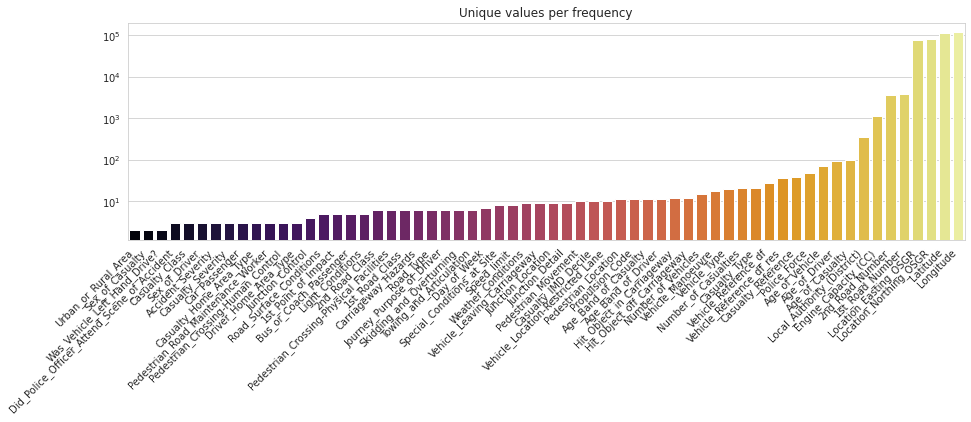

In [14]:
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

In [15]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  float64
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

# 4. Quality Investigation

In [16]:
# 4.1 Dupes
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=['Accident_Index'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [17]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=['Accident_Index'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X.drop_duplicates(subset=columns_to_consider, inplace=True)
df_X.shape

(363221, 67)

# Missing Values

Text(114.0, 0.5, 'Sample Number')

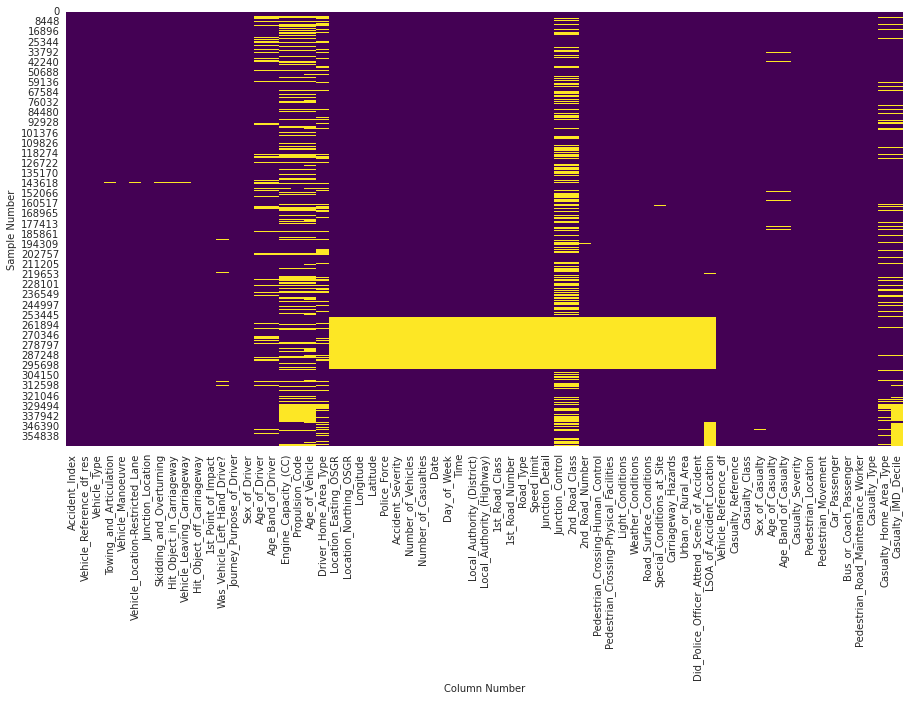

In [18]:
# Missing samples / rows
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [19]:
!pip install missingno

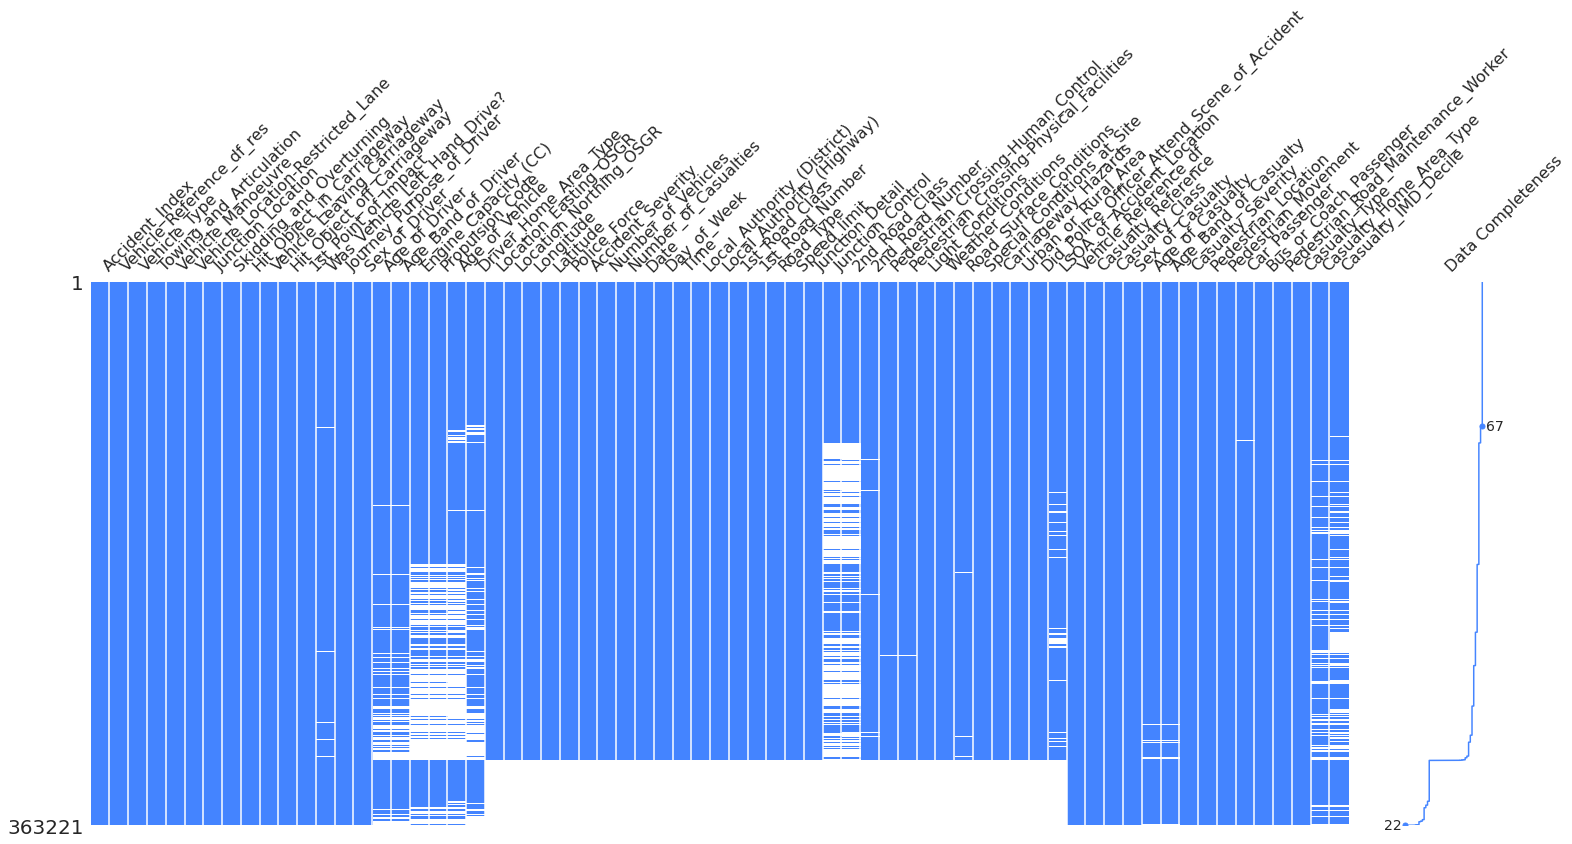

In [20]:
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [21]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

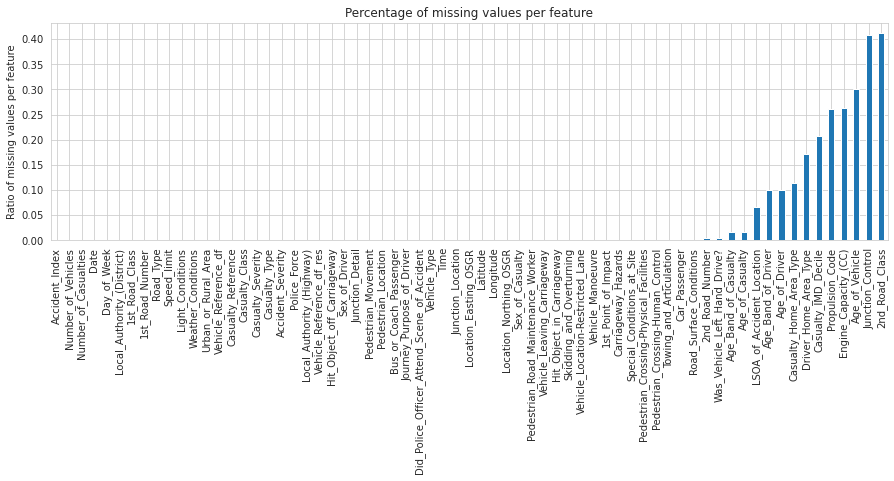

In [22]:
# per column - feature
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [23]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

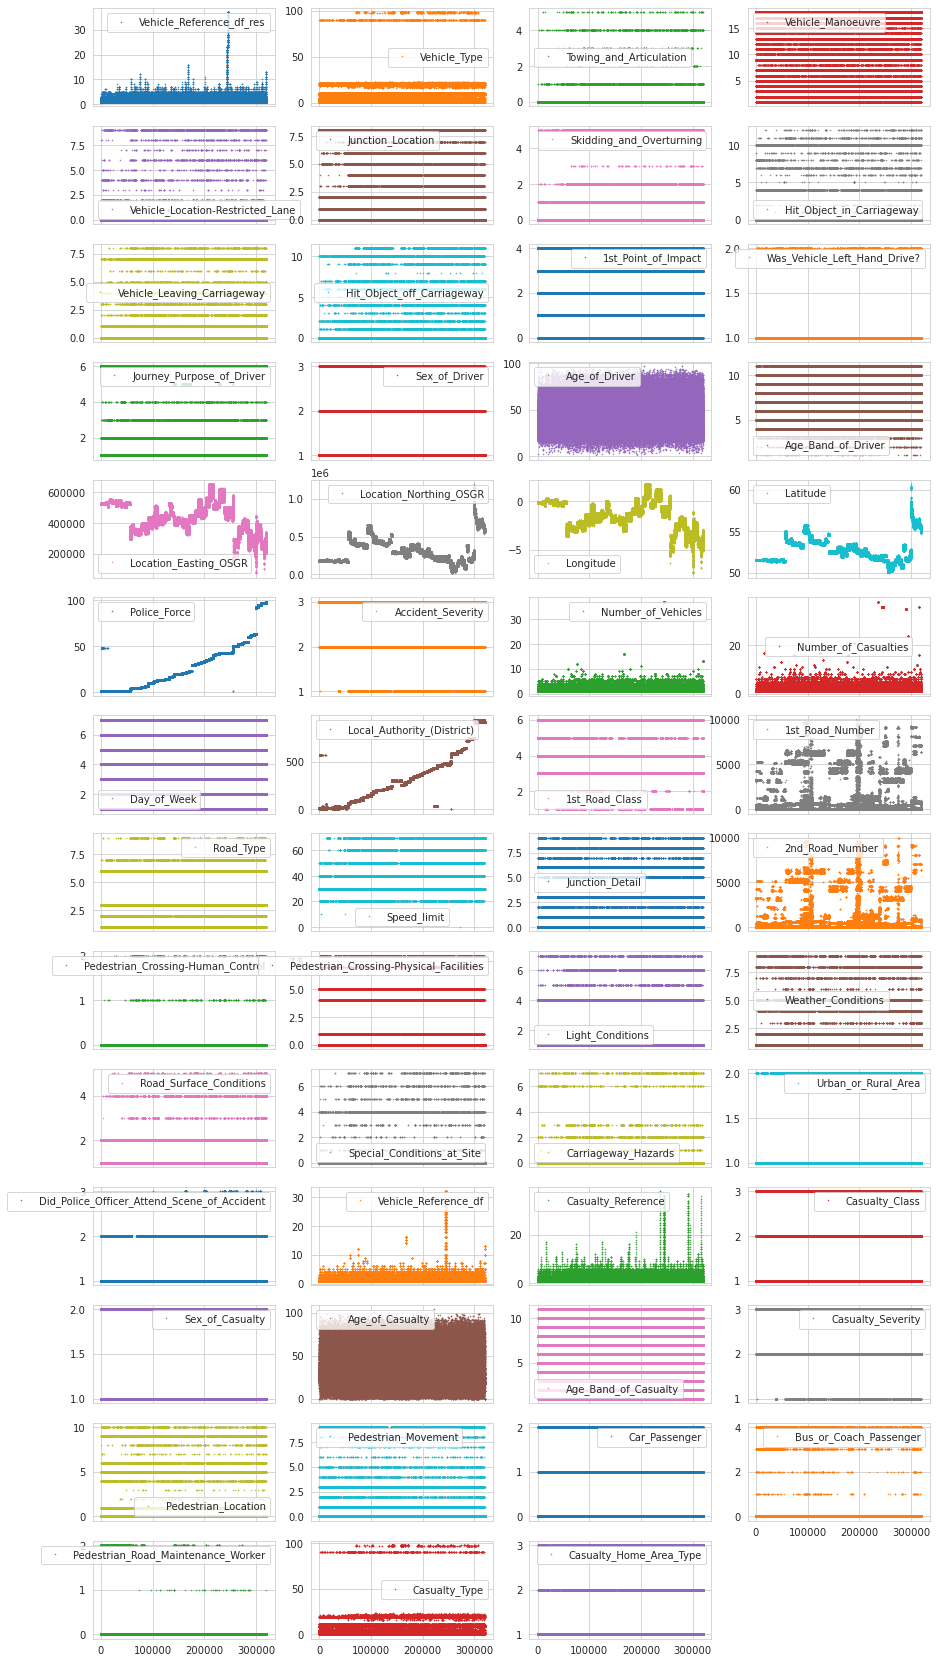

In [24]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [25]:
# Quality investigation for cat features

In [26]:
# Extract descriptive properties of non-numerical features
df_X.describe(exclude=["number", "datetime"])

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          319790      319790  319746                    319790   
unique         123645         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2969                      8457   

       LSOA_of_Accident_Location  
count                     298693  
unique                     25977  
top                    E01028497  
freq                        1456

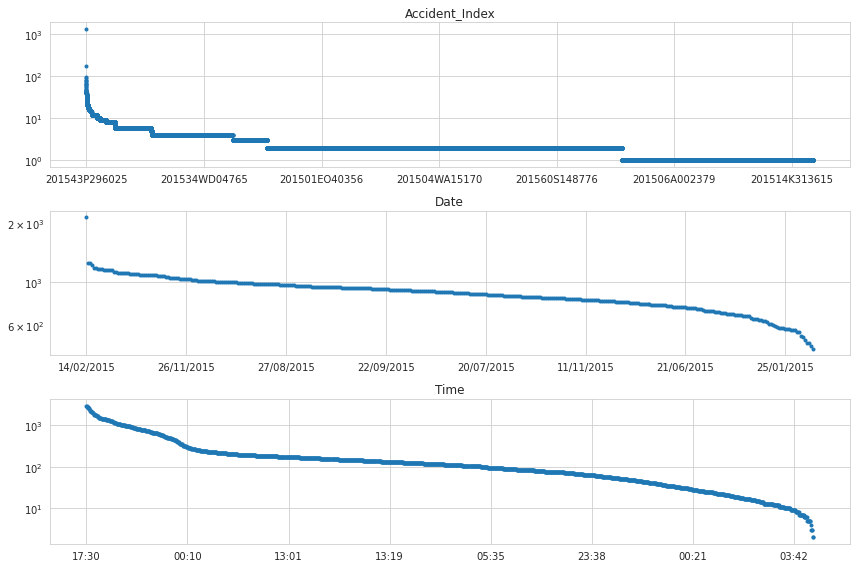

In [27]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [28]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

# Content Investigation

In [31]:
# Feature Distribution

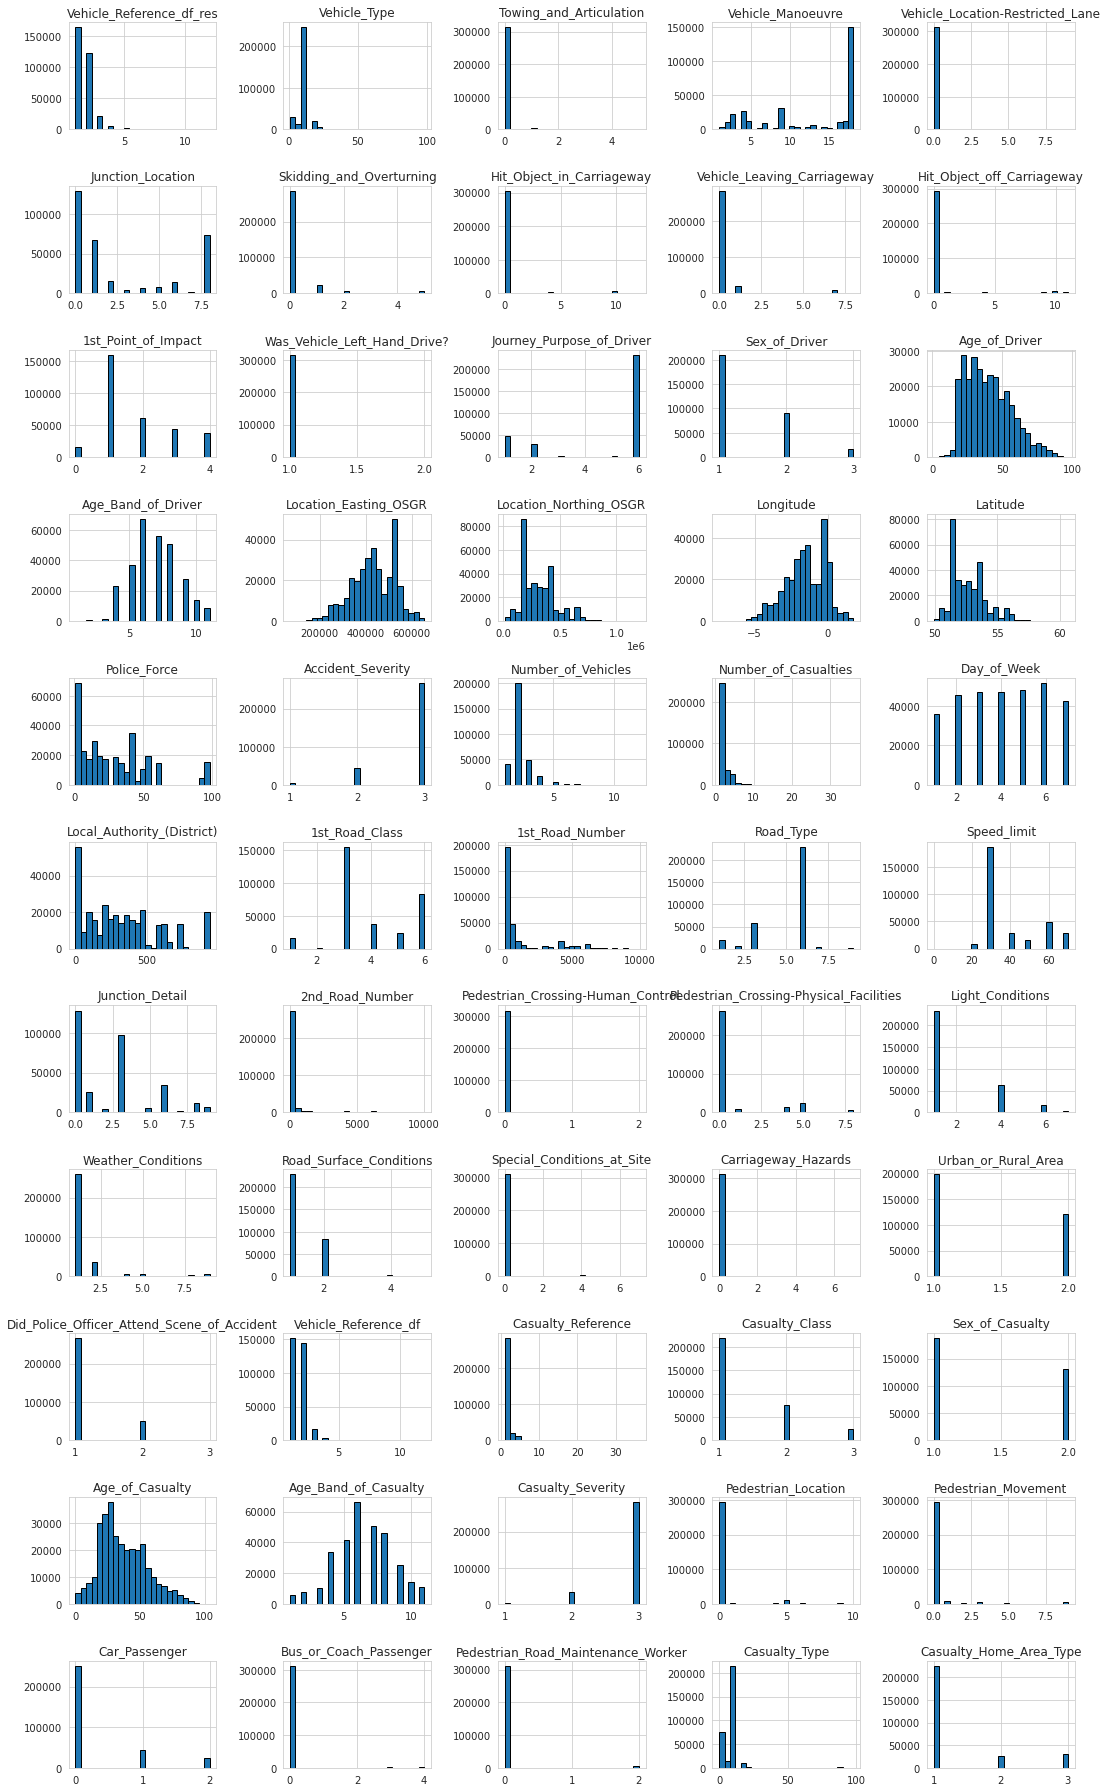

In [29]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

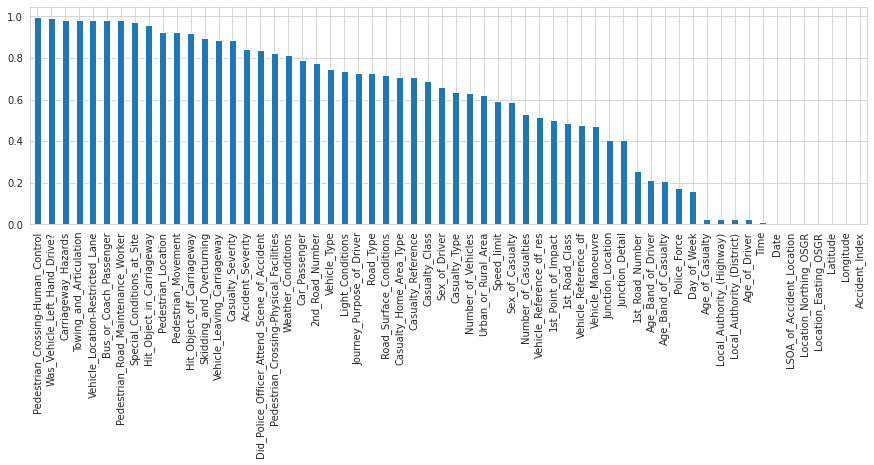

In [30]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));


In [33]:
# Feature Patterns (Univariate and Bivariate Analysis)

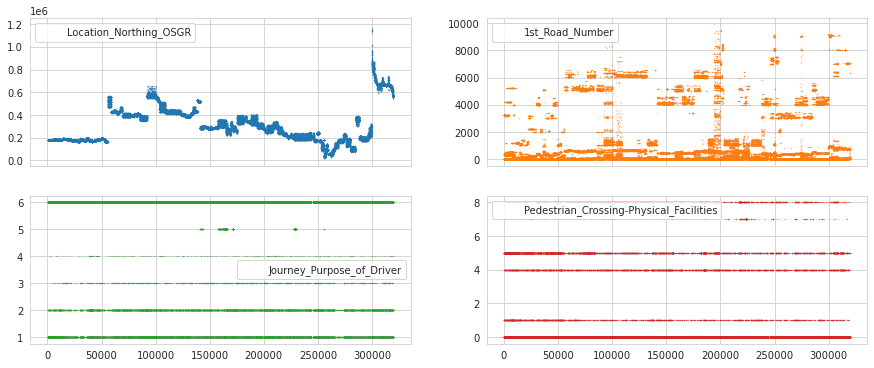

In [34]:
df_X[["Location_Northing_OSGR", "1st_Road_Number",
      "Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6));

In [35]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

In [36]:
# Analysis of Continuous Features

In [37]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape

(317665, 11)

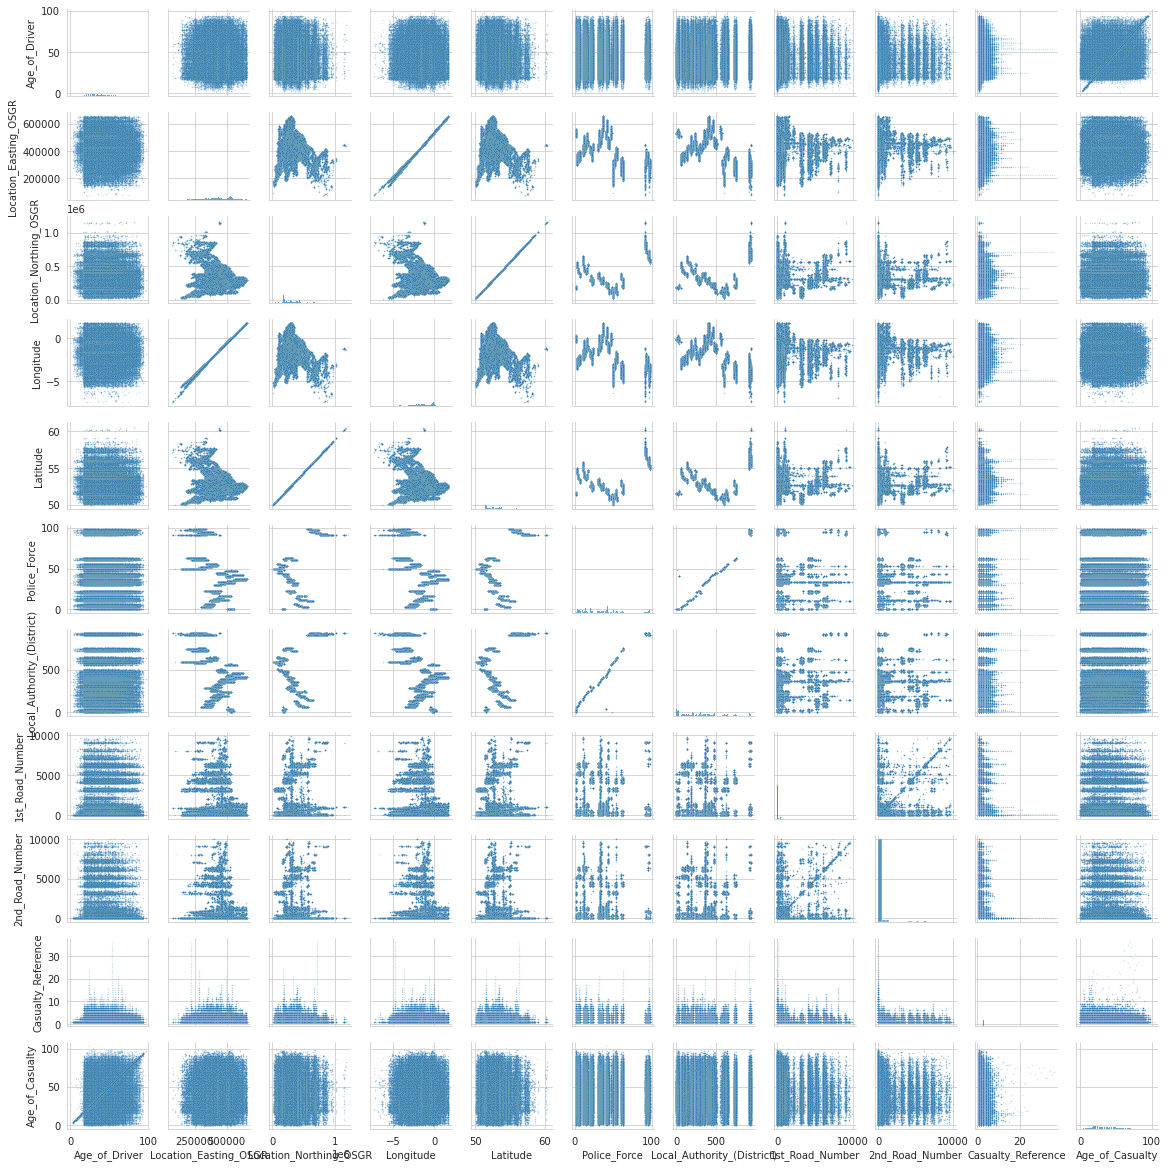

In [38]:
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

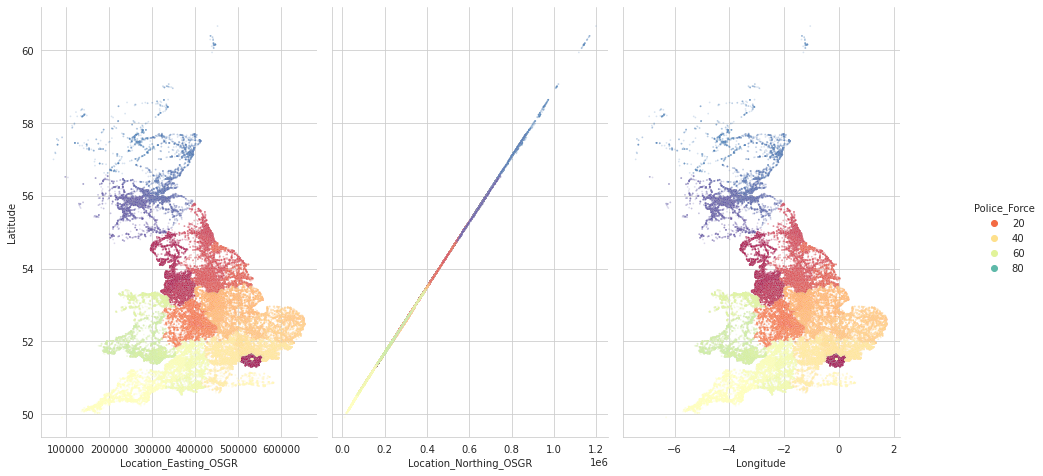

In [39]:
g = sns.pairplot(
    df_X, plot_kws={'s': 3, 'alpha': 0.2}, hue='Police_Force', palette='Spectral',
    x_vars=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude'],
    y_vars='Latitude');
g.fig.set_size_inches(15,8)

In [40]:
# Discrete and Ordinal Features

In [41]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 44)

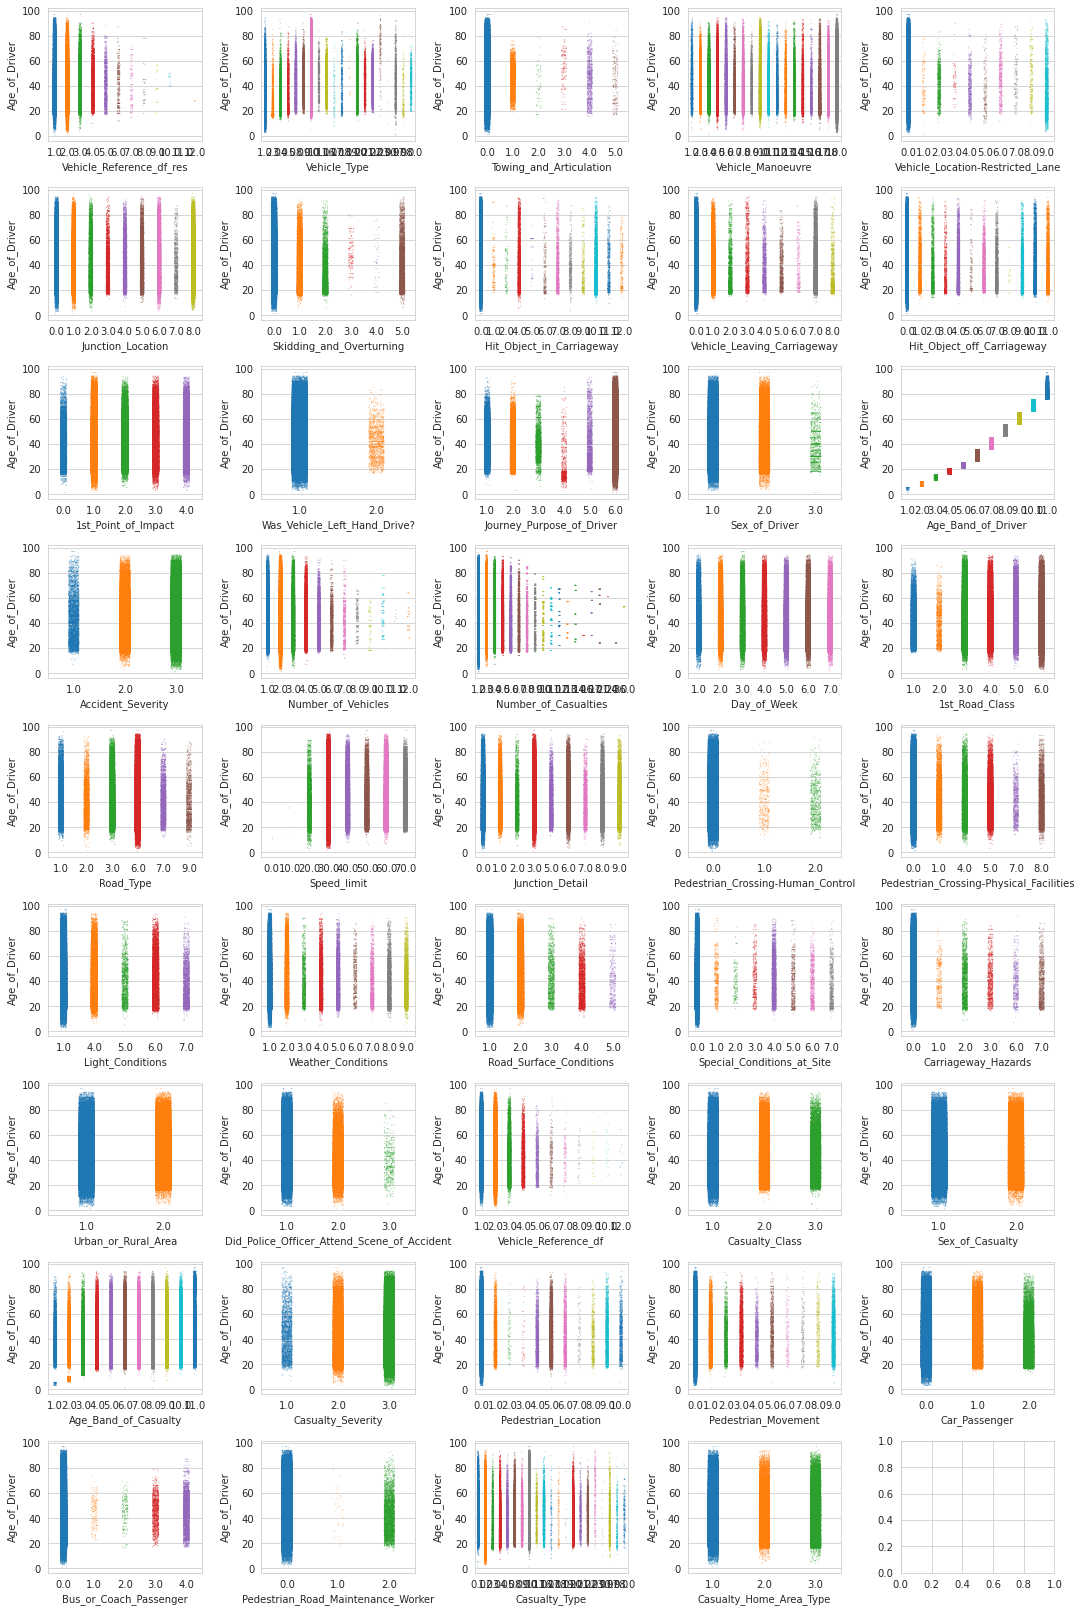

In [42]:
# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

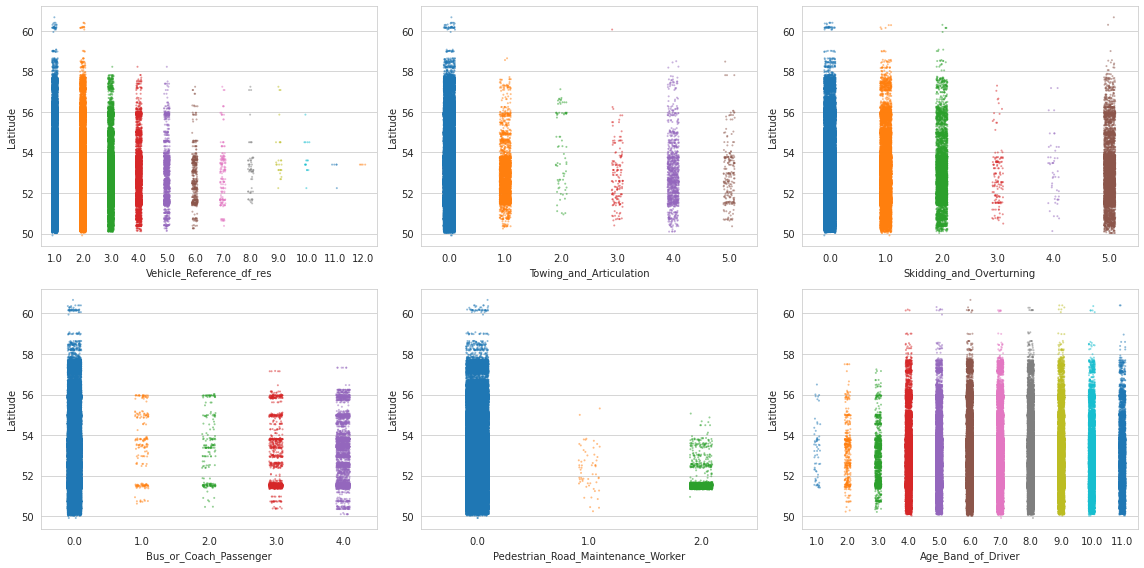

In [43]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();

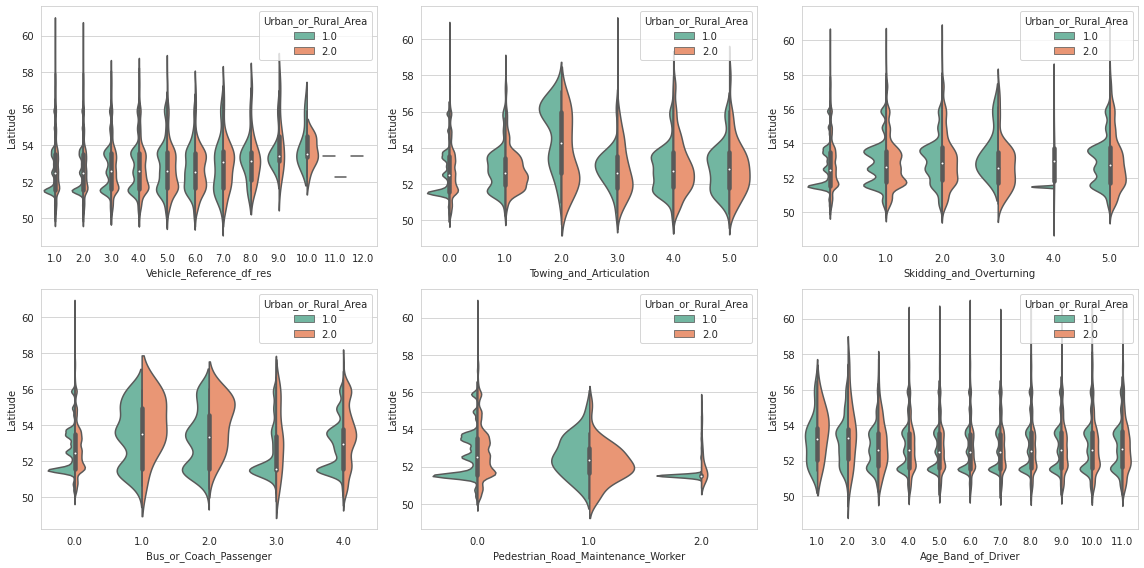

In [44]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout();

In [45]:
# Feature Relationships

In [46]:
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

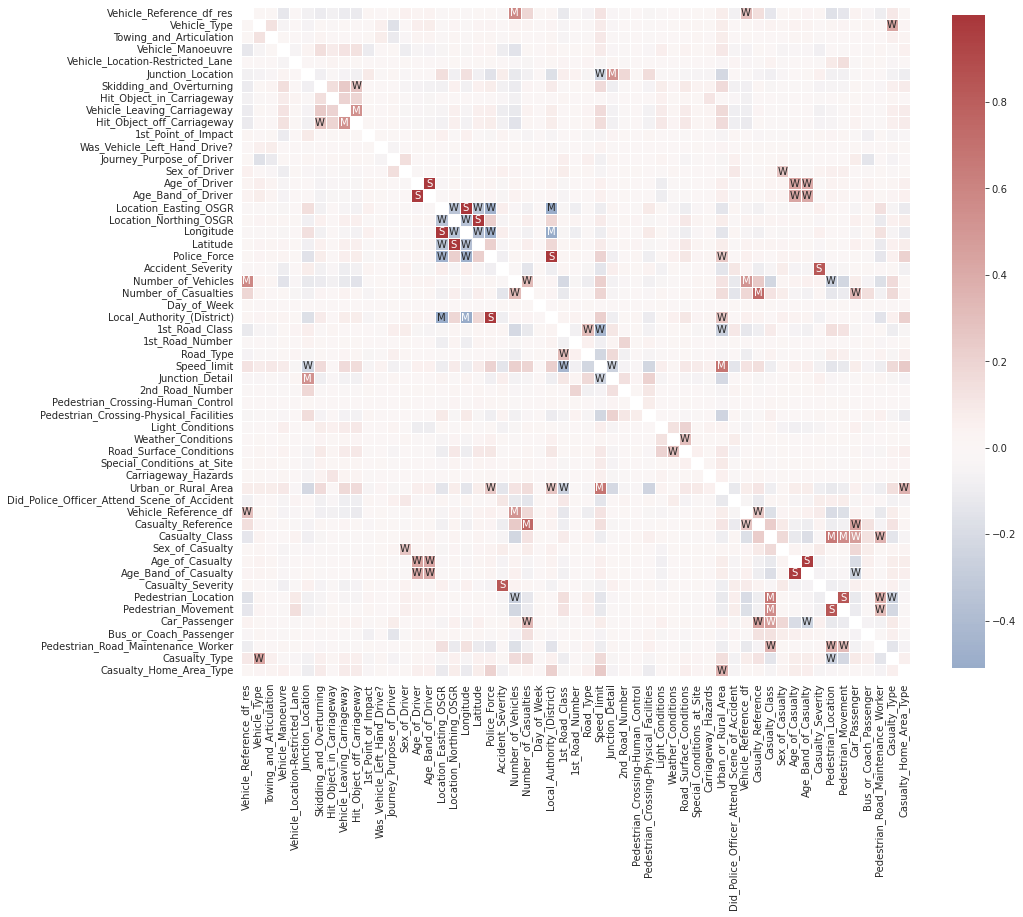

In [47]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [48]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Age_Band_of_Driver          Age_of_Driver             0.979019
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1485, dtype: float64